# Hypotheses 3 and 4 - Analysis

## Hypotheses
### Hypothesis 3: Pedestrian activity has decreased since the scaling back of Job Keeper
### Hypothesis 4: Pedestrian activity would decrease after JobKeeper was tapered

## Set up

In [1]:
# Set up
import pandas as pd
import requests
from pprint import pprint
import gmaps
import os
import json
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import scipy.stats as st

from api_keys_tokens import google_key


## Hypothesis 3 Findings

#### There appear to be an inverse relationship between pedestrian activity and JobKeeper claims per postcode.
Statistically significant moderate to strong negative correlations were found between pedestrian activity and JobKeeper Business applications for 5 of the 7 Melbourne postcodes observed (3000, 3004, 3008, 3052, 3053).

We think this correlation might exist because pedestrians are often customers and an increase in JobKeeper claims might be an indication that a business because they are recieving fewer customers. If a business is doing well, it can afford to employ it's employees fulltime and thus pay them too much to be able to access JobKeeper.

## Hypothesis 4 Findings

#### There is a no statistically signifcant difference between pedestrian activity during and after JobKeeper was tapered.
As can be seen in figure 1, figure 3, and figure 4, pedestrian activity appears to have decreased in the months after JobKeeper was tapered. Although there does appear to be a decline in pedestrian activity after the JobKeeper tapering, our analysis shows that there no statistically significant difference in pedestrian activity during these periods.

Since the time spans of these two periods are unequal, further analysis was done to compare the five months leading up to the end of JobKeeper vs the five months following it. Again not statistically significant difference was found between these two time periods.

## Descriptive Analysis (Hypotheses 3 and 4)

#### Figure 1: Pedestrian Traffic per postcode from August 2019 to August 2021

The following shows the total pedestrian activity from all 30 sensor locations counted during every hour of every day for the last two years.

In [2]:
# Get the data
df = pd.read_csv("Melbourne City Council Data/Pedestrian_Activity_by_Postcode_per_month.csv")

# Function to scale down the pedestrian numbers by 1000 in order to make them easier to graph
def scale_down(pop):
    return pop/1000

column_list = ["3000","3004","3006","3008","3008","3010","3052","3053"]

# Scale down the data by 1000
df[column_list] = df[column_list].apply(scale_down)

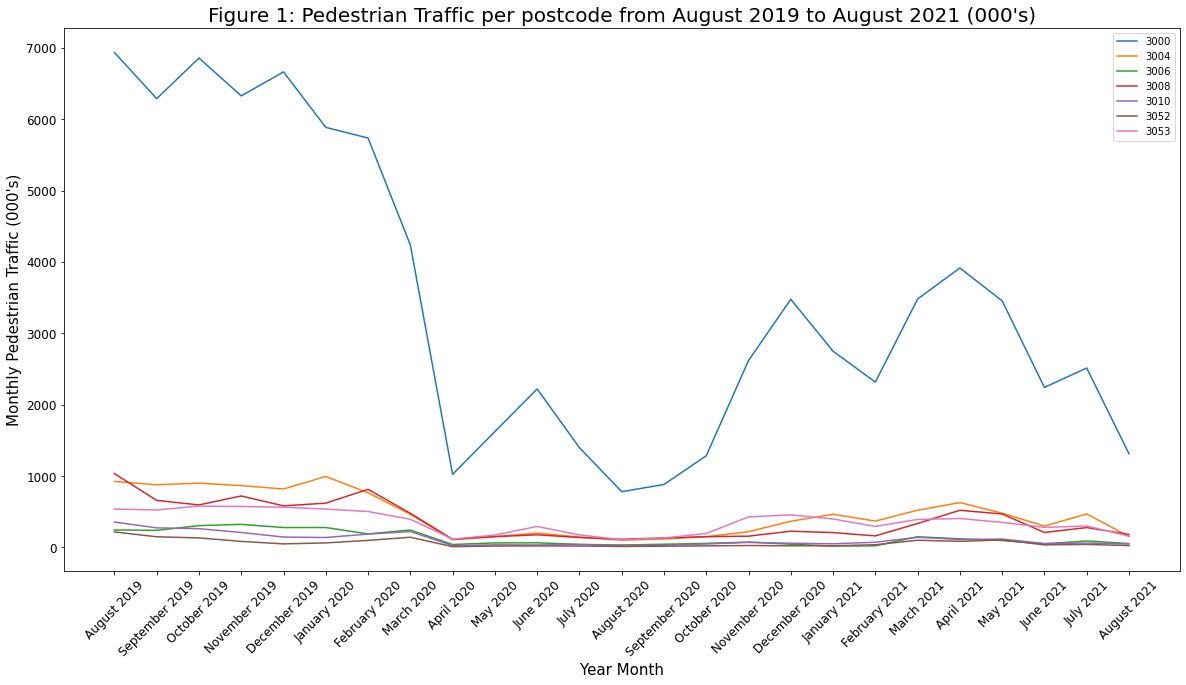

In [3]:
# Set tick spacing
tick_spacing = 1

# Plot the data
df_line_plot = df.plot(x = "Date",figsize = (20,10))

# Improve figure layout
df_line_plot.set_xlabel(xlabel = "Year Month", size = 15)
df_line_plot.set_ylabel(ylabel = "Monthly Pedestrian Traffic (000's)", size = 15)
df_line_plot.set_title(("Figure 1: Pedestrian Traffic per postcode from August 2019 to August 2021 (000's)") , size = 20)
df_line_plot.xaxis.set_tick_params(labelsize = 12, rotation = 45)
df_line_plot.yaxis.set_tick_params(labelsize = 12)

date_list = ['August 2019', 'September 2019','October 2019', 'November 2019', 'December 2019',
             'January 2020', 'February 2020', 'March 2020', 'April 2020', 'May 2020', 'June 2020',
             'July 2020', 'August 2020', 'September 2020', 'October 2020', 'November 2020', 'December 2020', 
             'January 2021','February 2021', 'March 2021', 'April 2021', 'May 2021', 'June 2021',
             'July 2021', 'August 2021']

# Fix tick values
df_line_plot.ticklabel_format(axis = 'y', style = 'plain')

df_line_plot.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

positions = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

df_line_plot.xaxis.set_major_locator(ticker.FixedLocator(positions))
df_line_plot.xaxis.set_major_formatter(ticker.FixedFormatter(date_list))

plt.savefig("Hypotheses 3 and 4 Plots/Figure 1.png", dpi = 400)

#### Figure 2: Pedestrian activity before the beginning of JobKeeper (August 2019 until the end of March 2020)

In [4]:
# Retrieve it
before_jobkeeper_pedestrian_count = pd.read_csv("Melbourne City Council Data/before_jobkeeper_pedestrian_count.csv")

# Scale down the data by 1,000
before_jobkeeper_pedestrian_count[column_list] = before_jobkeeper_pedestrian_count[column_list].apply(scale_down)

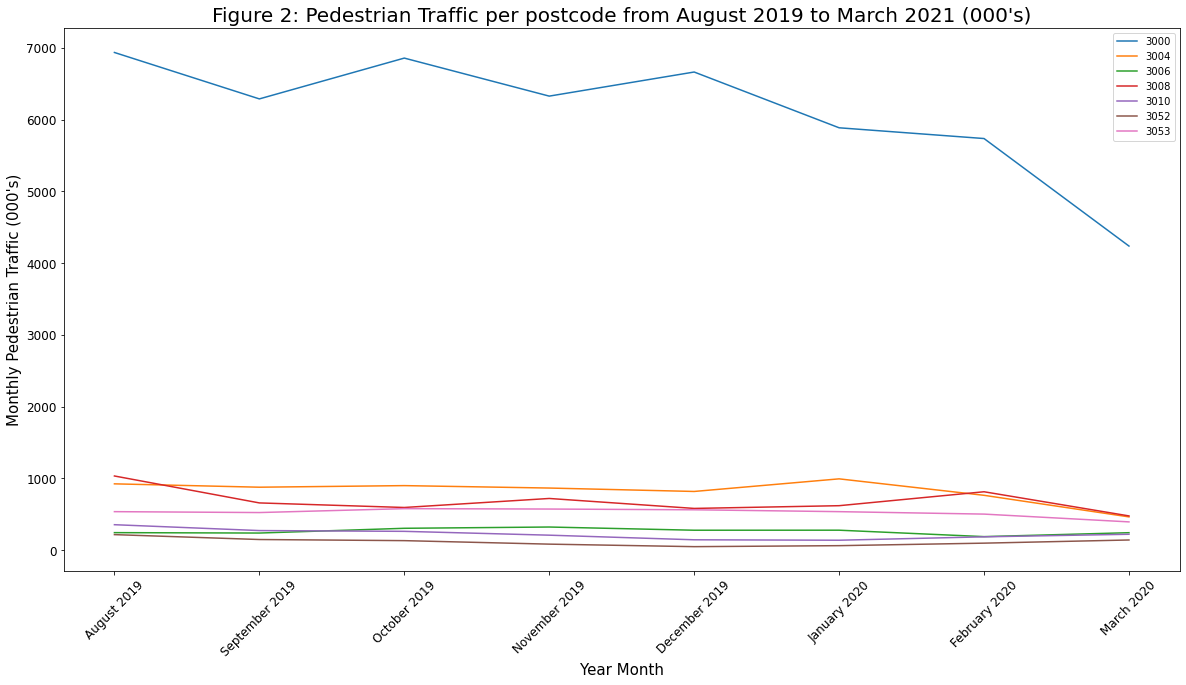

In [5]:
# Set tick spacing
tick_spacing = 1

# Plot the data
bjk_line_plot = before_jobkeeper_pedestrian_count.plot(x = "Date",figsize = (20,10))

# Improve figure layout
bjk_line_plot.set_xlabel(xlabel = "Year Month", size = 15)
bjk_line_plot.set_ylabel(ylabel = "Monthly Pedestrian Traffic (000's)", size = 15)
bjk_line_plot.set_title(("Figure 2: Pedestrian Traffic per postcode from August 2019 to March 2021 (000's)") , size = 20)
bjk_line_plot.xaxis.set_tick_params(labelsize = 12, rotation = 45)
bjk_line_plot.yaxis.set_tick_params(labelsize = 12)

# Save the plot
plt.savefig("Hypotheses 3 and 4 Plots/Figure 2.png", dpi = 400)

#### Figure 3: Pedestrian Traffic during JobKeeper

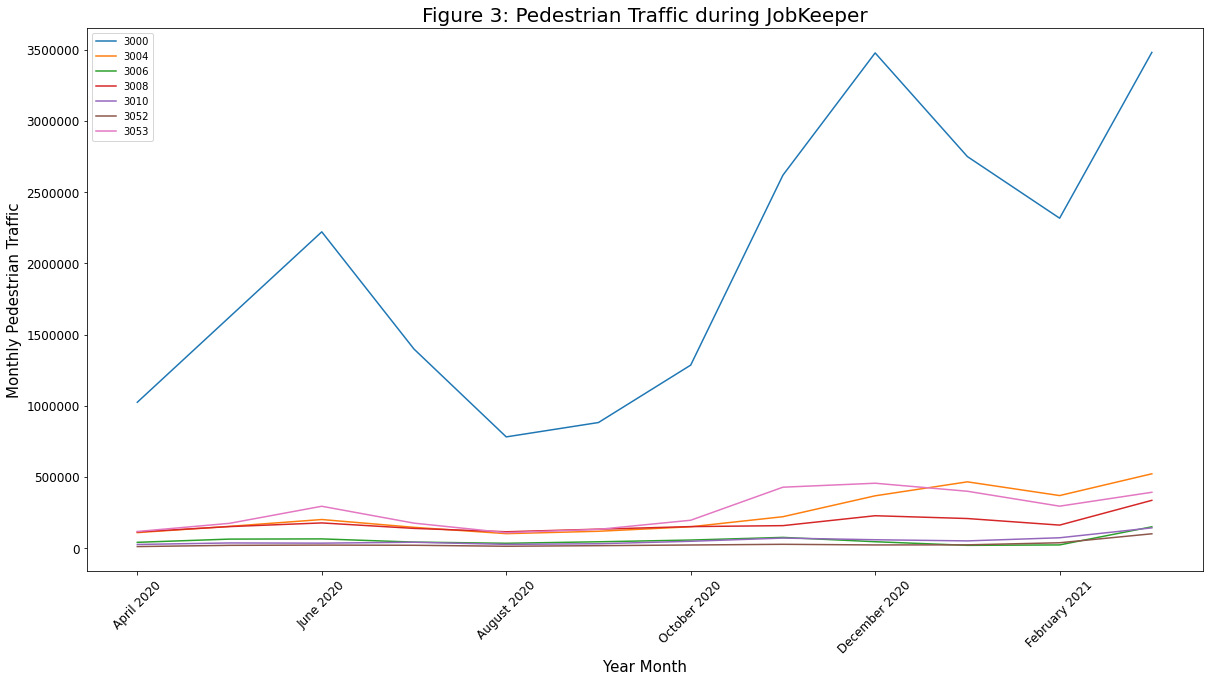

In [6]:
jobkeeper_pedestrian_data = pd.read_csv("Melbourne City Council Data/during_jobkeeper_pedestrian_count.csv")

# Set the tick spacing
tick_spacing = 1

# Plot the data
jobkeeper_pedestrian_data_line_plot = jobkeeper_pedestrian_data.plot(x = "Date",figsize = (20,10))

# Improve figure layout
jobkeeper_pedestrian_data_line_plot.set_xlabel(xlabel = "Year Month", size = 15)
jobkeeper_pedestrian_data_line_plot.set_ylabel(ylabel = "Monthly Pedestrian Traffic", size = 15)
jobkeeper_pedestrian_data_line_plot.set_title(("Figure 3: Pedestrian Traffic during JobKeeper") , size = 20)
jobkeeper_pedestrian_data_line_plot.xaxis.set_tick_params(labelsize = 12, rotation = 45)
jobkeeper_pedestrian_data_line_plot.yaxis.set_tick_params(labelsize = 12)

# # Fix tick values
jobkeeper_pedestrian_data_line_plot.ticklabel_format(axis = 'y', style = 'plain')

plt.savefig("Hypotheses 3 and 4 Plots/Figure 3.png", dpi = 400)

#### Figure 4: Pedestrian activity shortly after the end of JobKeeper (April 2021 upto and including August 2021) 
##### (Note: There are 3 days of data between official end of JobKeeper Payments (March 28) and the beginning of this data set (April 1) which this graph does not take into account.)

In [7]:
# Retrieve it
after_jobkeeper_pedestrian_count = pd.read_csv("Melbourne City Council Data/after_jobkeeper_pedestrian_count.csv")

# Scale down the data by 1,000
after_jobkeeper_pedestrian_count[column_list] = after_jobkeeper_pedestrian_count[column_list].apply(scale_down)

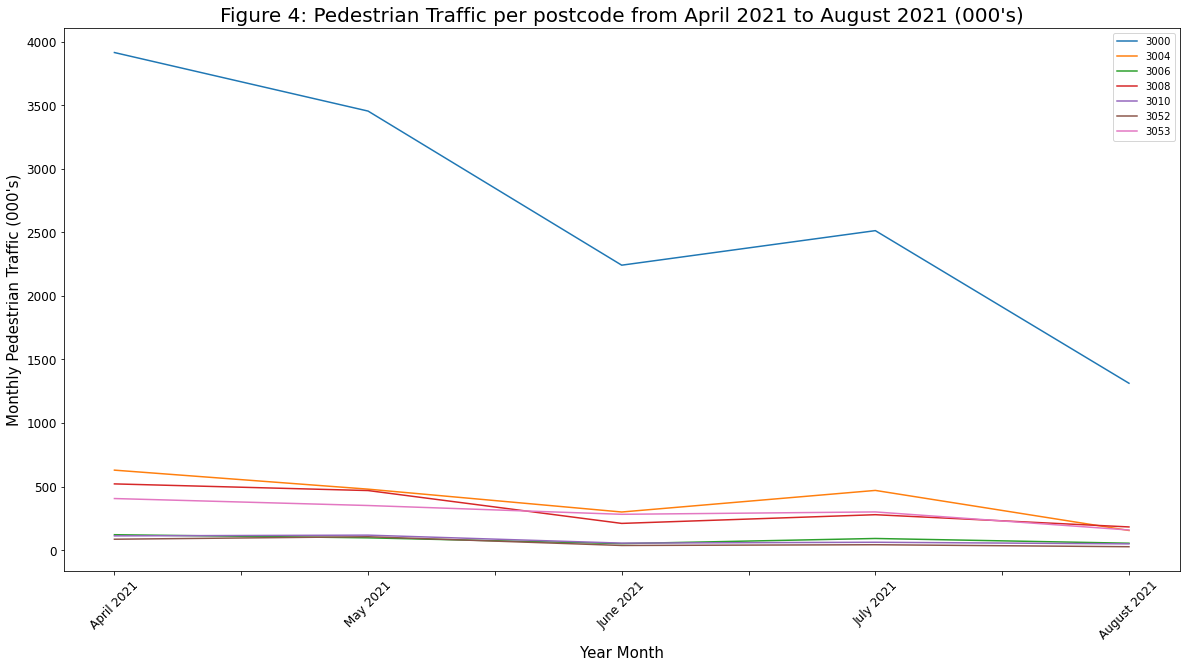

In [8]:
# Set tick spacing
tick_spacing = 1

# Plot the data
ajk_line_plot = after_jobkeeper_pedestrian_count.plot(x = "Date",figsize = (20,10))

# Improve figure layout
ajk_line_plot.set_xlabel(xlabel = "Year Month", size = 15)
ajk_line_plot.set_ylabel(ylabel = "Monthly Pedestrian Traffic (000's)", size = 15)
ajk_line_plot.set_title(("Figure 4: Pedestrian Traffic per postcode from April 2021 to August 2021 (000's)") , size = 20)
ajk_line_plot.xaxis.set_tick_params(labelsize = 12, rotation = 45)
ajk_line_plot.yaxis.set_tick_params(labelsize = 12)

# Save the plot
plt.savefig("Hypotheses 3 and 4 Plots/Figure 4.png", dpi = 400)

#### Figure 5: Business JobKeeper Applications per postcode

In [9]:
# Read the file from a csv
applications_counts_data = pd.read_csv("jobkeeper data/application_counts.csv")

# Get set the index
applications_counts_data = applications_counts_data.set_index("Postcode")

# Transpose data
applications_counts_data = applications_counts_data.T.reset_index()

# # Fix headers
applications_counts_data = applications_counts_data.rename_axis(None, axis = 1)
applications_counts_data = applications_counts_data.rename(columns = {"index" : "date"})

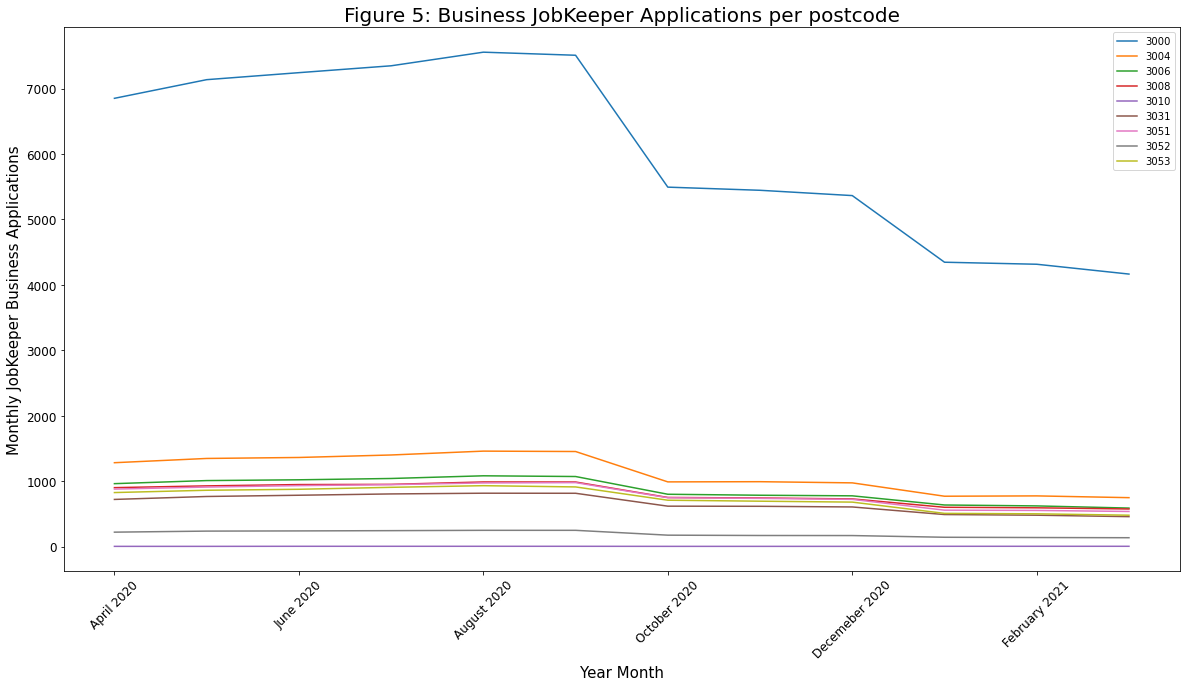

In [10]:
# Plot the data
app_count_plot = applications_counts_data.plot(x = "date",figsize = (20,10))

# Improve figure layout
app_count_plot.set_xlabel(xlabel = "Year Month", size = 15)
app_count_plot.set_ylabel(ylabel = "Monthly JobKeeper Business Applications", size = 15)
app_count_plot.set_title(("Figure 5: Business JobKeeper Applications per postcode") , size = 20)
app_count_plot.xaxis.set_tick_params(labelsize = 12, rotation = 45)
app_count_plot.yaxis.set_tick_params(labelsize = 12)

plt.savefig("Hypotheses 3 and 4 Plots/Figure 5.png", dpi = 400)

## Descriptive Analysis (Hypothesis 3 only)

#### Figure 6 Correlation between pedestrian activity and JobKeeper applications per postcode for Postcode 3000

In [11]:
# Pedestrian Activity during JobKeeper
pedestrian_activity = pd.read_csv("Melbourne City Council Data/during_jobkeeper_pedestrian_count.csv")
# JobKeeper applications
applications_counts_data = pd.read_csv("jobkeeper data/application_counts.csv")

# Fix Application Count Data
applications_counts_data = applications_counts_data.T
new_header = applications_counts_data.iloc[0]
applications_counts_data = applications_counts_data[1:] #take the data less the header row
applications_counts_data.columns = new_header

# Fix Date Column
applications_counts_data = applications_counts_data.reset_index()
applications_counts_data = applications_counts_data.rename(columns = {"index":"Date"})

postcodes = ['3000','3004','3006','3008','3010','3052','3053']

pedestrian_activity[postcodes] = pedestrian_activity[postcodes].apply(scale_down)

# Create JobKeeper Postcode 3000 series
jk_pc_3000_values = applications_counts_data[3000]


# Create Pedestrian Data Postcode 3000 series
ped_pc_3000_values = pedestrian_activity["3000"].values

The correlation between both factors is -0.76 with a p-value of 0.00436 


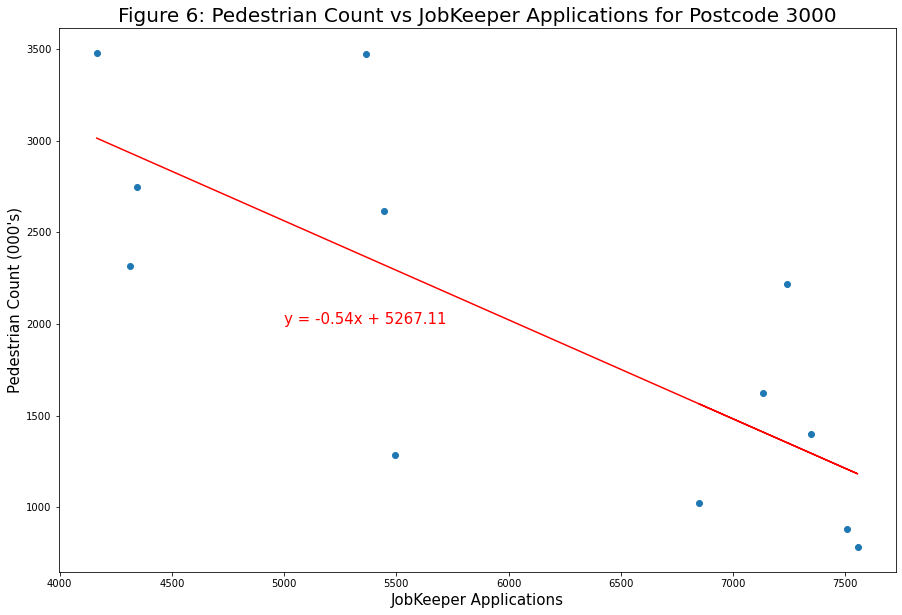

In [12]:
# Creat the plot
plt.figure(figsize = (15,10))

fig_6_scatter_plot = plt.scatter(x = jk_pc_3000_values,y=ped_pc_3000_values)

plt.xlabel("JobKeeper Applications", size = 15)
plt.title(("Figure 6: Pedestrian Count vs JobKeeper Applications for Postcode 3000"), size = 20)
plt.ylabel("Pedestrian Count (000's)", size = 15)

# Step 4: Create the linear regression model
x_values = jk_pc_3000_values
y_values = ped_pc_3000_values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

# Step 4: Add the Linear Regression Model Description to the scatter plot
plt.annotate(line_eq,xy = (5000,2000), fontsize = 15 , color = "red")

# Part 2: Get the Correlation Coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)} with a p-value of {round(correlation[1],5)} ")

plt.savefig("Hypotheses 3 and 4 Plots/Figure 6.png", dpi = 400)

## Statistical Analysis (Hypothesis 3)

#### Correlation test for Pedestrian JobKeeper data and JobKeeper business application data in every relevent postcode

In [13]:
# Pedestrian Activity during JobKeeper
pedestrian_activity = pd.read_csv("Melbourne City Council Data/during_jobkeeper_pedestrian_count.csv")
# JobKeeper applications
applications_counts_data = pd.read_csv("jobkeeper data/application_counts.csv")

# Fix Application Count Data
applications_counts_data = applications_counts_data.T
new_header = applications_counts_data.iloc[0]
applications_counts_data = applications_counts_data[1:] #take the data less the header row
applications_counts_data.columns = new_header
# Fix Date Column
applications_counts_data = applications_counts_data.reset_index()
applications_counts_data = applications_counts_data.rename(columns = {"index":"Date"})

postcodes = [3000,3004,3006,3008,3010,3052,3053]

for postcode in postcodes:
    jk_pc_values = applications_counts_data[postcode].values
    ped_pc_values = pedestrian_activity[str(postcode)].values
    
    correlation = st.pearsonr(jk_pc_values, ped_pc_values)
    print(f"The correlation between both factors for postcode {postcode} \n is {round(correlation[0],2)} with a p-value of {round(correlation[1],5)} ")

The correlation between both factors for postcode 3000 
 is -0.76 with a p-value of 0.00436 
The correlation between both factors for postcode 3004 
 is -0.87 with a p-value of 0.00027 
The correlation between both factors for postcode 3006 
 is -0.26 with a p-value of 0.40575 
The correlation between both factors for postcode 3008 
 is -0.69 with a p-value of 0.01349 
The correlation between both factors for postcode 3010 
 is 0.15 with a p-value of 0.65185 
The correlation between both factors for postcode 3052 
 is -0.59 with a p-value of 0.04526 
The correlation between both factors for postcode 3053 
 is -0.72 with a p-value of 0.00776 


## Statistical Analysis (Hypothesis 4)

#### Independent Welch's t-test for pedestrain activity during JobKeeper vs after JobKeeper

In [14]:
# Get Data
during_jobkeeper = pd.read_csv("Melbourne City Council Data/during_jobkeeper_pedestrian_count.csv")
after_jobkeeper = pd.read_csv("Melbourne City Council Data/after_jobkeeper_pedestrian_count.csv")

# Perform Welch's t-test on all Postcodes
postcodes = ["3000","3004","3006","3008","3010","3052","3053"]

for postcode in postcodes:
    during_jobkeeper_postcode = during_jobkeeper[postcode]
    after_jobkeeper_postcode = after_jobkeeper[postcode]
    
    # Are the means of both samples statistically significant?
    test = st.ttest_ind(during_jobkeeper_postcode, after_jobkeeper_postcode, equal_var=False)
    
    t_statistic = round(test[0],3)
    
    p_value = round(test[1],3)
    
    if(p_value < 0.05):
        result = "a stastically significant difference between the means"
    else:
        result = "not a stastically significant difference between the means"
    
    # Print the result
    print(f"- the p-value of the Welch's t-test for postcode {postcode} is {p_value} which means there is {result}")
#     print(f"the test statistic of the Welch's t-test for postcode {postcode} is {t_statistic}")


- the p-value of the Welch's t-test for postcode 3000 is 0.233 which means there is not a stastically significant difference between the means
- the p-value of the Welch's t-test for postcode 3004 is 0.126 which means there is not a stastically significant difference between the means
- the p-value of the Welch's t-test for postcode 3006 is 0.132 which means there is not a stastically significant difference between the means
- the p-value of the Welch's t-test for postcode 3008 is 0.08 which means there is not a stastically significant difference between the means
- the p-value of the Welch's t-test for postcode 3010 is 0.185 which means there is not a stastically significant difference between the means
- the p-value of the Welch's t-test for postcode 3052 is 0.116 which means there is not a stastically significant difference between the means
- the p-value of the Welch's t-test for postcode 3053 is 0.539 which means there is not a stastically significant difference between the means


#### Independent Welch's t-test for pedestrain activity during the last five months of JobKeeper vs the last five months after JobKeeper

In [15]:
# Get Data
during_jobkeeper = pd.read_csv("Melbourne City Council Data/during_jobkeeper_pedestrian_count.csv")

# Get only the JobKeeper data from the last 5 months
during_jobkeeper_last_five_months = during_jobkeeper.loc[(during_jobkeeper["Date"] == "November 2020")|
                                                        (during_jobkeeper["Date"] == "December 2020")|
                                                         (during_jobkeeper["Date"] == "January 2021")|
                                                         (during_jobkeeper["Date"] == "February 2021")|
                                                         (during_jobkeeper["Date"] == "March 2021")
                                                        ]

after_jobkeeper = pd.read_csv("Melbourne City Council Data/after_jobkeeper_pedestrian_count.csv")

# Perform Welch's t-test on all Postcodes
postcodes = ["3000","3004","3006","3008","3010","3052","3053"]

for postcode in postcodes:
    during_jobkeeper_last_five_months_postcode = during_jobkeeper_last_five_months[postcode]
    after_jobkeeper_postcode = after_jobkeeper[postcode]
    
    # Are the means of both samples statistically significant?
    test = st.ttest_ind(during_jobkeeper_last_five_months_postcode, after_jobkeeper_postcode, equal_var=False)
    
    p_value = round(test[1],3)
    
    if(p_value < 0.05):
        result = "stastically significant"
    else:
        result = "not stastically significant"
    
    # Print the result
    print(f"the p-value of the Welch's t-test for postcode {postcode} is {p_value} which is {result}")

the p-value of the Welch's t-test for postcode 3000 is 0.658 which is not stastically significant
the p-value of the Welch's t-test for postcode 3004 is 0.862 which is not stastically significant
the p-value of the Welch's t-test for postcode 3006 is 0.49 which is not stastically significant
the p-value of the Welch's t-test for postcode 3008 is 0.187 which is not stastically significant
the p-value of the Welch's t-test for postcode 3010 is 0.989 which is not stastically significant
the p-value of the Welch's t-test for postcode 3052 is 0.453 which is not stastically significant
the p-value of the Welch's t-test for postcode 3053 is 0.098 which is not stastically significant


## Addtional Descriptive Analysis (Hypothesis 3 and 4)

#### Figure 7:  Pedestrian counts during JobKeeper dates (Google Maps)

In [16]:
# Get the data
pedestrian_location_sensor_data = pd.read_csv("Melbourne City Council Data/pedestrian_location_sensor_data.csv")

# Print it
pedestrian_location_sensor_data

sensor_id  April 2020  April 2021  August 2019  August 2020  August 2021  \
0           3    127245.0    337429.0     981893.0      92864.0     105047.0   
1           4    130659.0    743653.0    1064689.0      97813.0     213065.0   
2           8     63684.0    112938.0     145010.0      68999.0      87220.0   
3          11     26293.0     38862.0      31232.0      23613.0      28847.0   
4          27     34092.0     66367.0     110089.0      32909.0      52907.0   
5          28     75387.0    563047.0     815103.0      69231.0     101841.0   
6          29     41299.0    121408.0     245551.0      34641.0      54388.0   
7          30     47556.0    262827.0     409135.0      35315.0      61402.0   
8          31     42345.0    126872.0     165319.0      40863.0      42118.0   
9          34     20090.0     45860.0     136747.0      15199.0      24083.0   
10         36     30495.0    134949.0     240292.0      23576.0      43193.0   
11         37     23406.0     93506.0     102369.0      18095.0      32445.0   
12         39     16198.0     53648.0     132679.0       7829.0      22503.0   
13         40     30592.0    120968.0     266445.0      25668.0      39229.0   
14         42     17733.0     74600.0     267000.0      17982.0      31747.0   
15         43     11460.0     85887.0     217817.0      13801.0      26917.0   
16         44      8605.0     37608.0      89111.0       8948.0      17444.0   
17         45     82847.0    407149.0     684434.0      49176.0     100076.0   
18         46     12151.0     29498.0      76900.0      12170.0      15812.0   
19         47    126345.0    451467.0     713839.0     124483.0     181465.0   
20         48     76767.0    114884.0     206594.0      49919.0      67532.0   
21         49     63224.0     71901.0     137175.0      63432.0      59596.0   
22         50     39297.0    156119.0     193312.0      37806.0      68052.0   
23         51     37375.0     68648.0      99287.0      21362.0      42525.0   
24         52     38453.0    178893.0     325035.0      26505.0      53710.0   
25         56     45277.0    155287.0     254487.0      31061.0      60292.0   
26         57     24203.0    369395.0     858475.0      22816.0      66464.0   
27         58     83204.0    335977.0     628506.0      60270.0      53182.0   
28         59     17323.0    253153.0     141743.0      12571.0     103895.0   
29         61     50829.0    178608.0     510872.0      44350.0      82287.0   

    December 2019  December 2020  February 2020  February 2021  ...  \
0        911297.0       351662.0       741496.0       104829.0  ...   
1       1244392.0       796734.0       905988.0       456419.0  ...   
2        146969.0       106220.0       135257.0        91493.0  ...   
3         54072.0        42354.0        37750.0        30952.0  ...   
4         86444.0        64809.0        64092.0        51909.0  ...   
5        732686.0       303045.0       701412.0       317626.0  ...   
6        279113.0        45554.0       190047.0        23016.0  ...   
7        367248.0       220907.0       299653.0       156380.0  ...   
8        187154.0       159977.0       161819.0        96964.0  ...   
9         94563.0        25311.0       106629.0        28641.0  ...   
10       218358.0        85227.0       226383.0        72164.0  ...   
11       112671.0        87371.0        94214.0        62600.0  ...   
12       165152.0        36503.0       189597.0        39369.0  ...   
13       198684.0        74704.0       216396.0        72257.0  ...   
14       118286.0        46734.0       141453.0        57148.0  ...   
15        50258.0        22905.0        99105.0        38200.0  ...   
16        27639.0        12693.0        45734.0        16159.0  ...   
17       765819.0       347148.0       576576.0       199341.0  ...   
18        40236.0        18148.0        56946.0        18163.0  ...   
19       802147.0       477188.0       633844.0       293808.0  ...   
20       207354.0       110180.0

In [17]:
# Configure gmaps
gmaps.configure(api_key = google_key)
fig = gmaps.figure()

# Using the template add the sensor location marks to the figure
info_box_template = """
<dl>
<dt>Sensor Name</dt><dd>{sensor_description}</dd>
<dt>Postcode</dt><dd>{Postcode}</dd>
<dt>April 2020 Pedestrian Count</dt><dd>{April 2020}</dd>
<dt>May 2020 Pedestrian Count</dt><dd>{May 2020}</dd>
<dt>June 2020 Pedestrian Count</dt><dd>{June 2020}</dd>
<dt>July 2020 Pedestrian Count</dt><dd>{July 2020}</dd>
<dt>August 2020 Pedestrian Count</dt><dd>{August 2020}</dd>
<dt>September 2020 Pedestrian Count</dt><dd>{September 2020}</dd>
<dt>October 2020 Pedestrian Count</dt><dd>{October 2020}</dd>
<dt>November 2020 Pedestrian Count</dt><dd>{November 2020}</dd>
<dt>December 2020 Pedestrian Count</dt><dd>{December 2020}</dd>
<dt>January 2021 Pedestrian Count</dt><dd>{January 2021}</dd>
<dt>February 2021 Pedestrian Count</dt><dd>{February 2021}</dd>
<dt>March 2021 Pedestrian Count</dt><dd>{March 2021}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
sensor_data_info = [info_box_template.format(**row) for index, row in pedestrian_location_sensor_data.iterrows()]

In [18]:
#GeoJSON data file source: https://data.melbourne.vic.gov.au/api/geospatial/m7yp-p495?method=export&format=GeoJSON

# Add Postcode boandaries
with open('Melbourne City Council Data/original data/geojson files/Postcodes.geojson') as f:
    geometry = json.load(f)
    
fig = gmaps.figure()
geojson_layer = gmaps.geojson_layer(geojson=geometry,fill_color = "yellow",fill_opacity = 0.2,stroke_color="blue")
fig.add_layer(geojson_layer)

# Add sensor locations
sensor_locations = pedestrian_location_sensor_data[["latitude", "longitude"]]
# Add the sensor markers to the postcode map
markers = gmaps.marker_layer(sensor_locations, info_box_content = sensor_data_info)
fig.add_layer(markers)

# Display the improved heat map
fig

Figure(layout=FigureLayout(height='420px'))